# PYTHON COURSE FOR SCIENTIFIC PROGRAMMING 
**Lecturer and main contributor to this lesson:**

Xabier Oyanguren Asua: oiangu9@gmail.com

**The lecture is based on previous material prepared by:**

Jan Scarabelli Calopa: Jan.Scarabelli@e-campus.uab.cat 


All the course material can be found at: https://llacorp.github.io/Python-Course-for-Scientific-Programming/ 

---

# LECTURE V : File manipulation

### $(1.)$ - [*FILE HANDLING*](#1)
### $(2.)$ - [*MANIPULATE DIRECTORY STRUCTURES*](#2)
### $(3.)$ - [*MANAGE NUMPY DATA*](#3)
### $(4.)$ - [*ADDITIONAL FILE TYPES*](#4)

### [FURTHER TOPICS NOT COVERED IN THE COURSE](#5)

---
---

<a id='1'></a>
## $(1.)$ File Handing


### (a) Open


| Indicator (naive/extra) | Open a file to... | Opening mode + | Pointer Position |
| --- | --- | --- | --- |
| r/r+ | Read it. | +writing | Beginning |
| w/w+ | Write on it. It **overwrites** the file if it already existed. Creates a new file otherwise | +reading | Beginning |
| x/x+ | Write on it. `FileExistsError` raised and execution will stop if it already existed (safe mode). Creates a new file otherwise | +reading | Beginning | 
| a/a+ | Write at the end of an already existing file if it exists. Creates a new file otherwise. | +reading | End


##### Note on Encodings


[https://docs.python.org/3/library/codecs.html#standard-encodings](https://docs.python.org/3/library/codecs.html#standard-encodings)

for example we could write `'utf_8'` or `'ascii'` as a third argument, say:

`open("File.txt", "w", "utf_8") `


### (b) Write and Close

**\n, \t, \' etc.**

#### Notes on Relative and Absolute Paths

`"Folder_1/Save_the_texts_here_Folder/File.txt"` is a **relative path**.

`"/home/xabier/Documents/UAB/My_texts/File.txt"` is an **absolute path**.

##### Important note for Windows vs Linux/MacOS users:
`" / "` vs `"\ "`

##### Comment on File names

##### Comment on Buffers

### (c) Read (note the cursor!)

**read() as iterable**

#### Readline

#### Readlines

### (d) Append

**x** mode

### (f) Tell and Seek

`.tell()` how many characters away from the beginning of the file the cursor is

`.seek()` takes as argument an integer and moves the cursor to that character position

### (g) With



#### Last Remark: multitasking


<a id='2'></a>
## $(2.)$ Manipulate Directory Structures


In [21]:
import os

#### The working directory (the implicit part of the relative paths) - os.getcwd()



Change the working directory to a desired path with `os.chdir()`

#### Creating directories `os.makedirs()`

#### Listing all the files and subdirectories in a directory `os.listdir()`:

**Wlaking a tree ** `os.walk()`

In [ ]:
for root, dirs, files in os.walk( my_current_path ):
    print(f"\nFiles under {root}")
    for name in files:
        print(name)
    print(f"\n\nDirectories under {root}")
    for name in dirs:
        print(name)

In [ ]:
for root, dirs, files in os.walk( my_current_path, topdown=False ):
    print(f"\nFiles under {root}")
    for name in files:
        print(name)
    print(f"\n\nDirectories under {root}")
    for name in dirs:
        print(name)

#### Removing files and directories `os.remove()` and `os.rmdir()`




<img src=http://c.tenor.com/SIiE1YV8yloAAAAd/cat-boom.gif width="200" height="200"> 

<a id='3'></a>
## $(3.)$ Manage Numpy Data

### (a) Data from .txt files the "handmade" way: file.write() to write and file.read() to read

In [1]:
import numpy as np

In [2]:
with open("data_example.txt","w") as npHandle:
    npHandle.write("1 2 3\n4 5 6")

In [5]:
# build array of zeros
a = np.zeros((2,3), dtype=int)

# read the array using open()
with open('data_example.txt', 'r') as datafile:
    for k, row_string in enumerate(datafile):
        a[k, :] = np.array(row_string.split(' '))
print(a)

[[1 2 3]
 [4 5 6]]


### (b) Data from .txt files using numpy: np.loadtxt() to read and np.savetxt() to save


#### np.loadtxt()


In [6]:
a = np.loadtxt("data_example.txt")
print(a)

[[1. 2. 3.]
 [4. 5. 6.]]


In [35]:
with open("data_np.txt","w") as npHandle:
    npHandle.write("1 0 0\n 0 1 0\n 0 0 1\n")

a = np.loadtxt("data_np.txt")
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [36]:
with open("data_example2.txt","w") as npHandle:
    npHandle.write("1,0,0\n0,1,0\n0,0,1\n")

a = np.loadtxt("data_example2.txt", dtype='int', delimiter=',')

print(a)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


#### np.savetxt()

In [37]:
a = np.array([1.0,2.0,3.0])

np.savetxt("data_example3.txt", a, delimiter=',') #default is ','

b = np.loadtxt("data_example3.txt")

print(a)
print(b)
print(np.array_equal( a,b )) # check that both arrays are equal

[1. 2. 3.]
[1. 2. 3.]
True


### (c) Data from .npy or .npz files (using numpy of course)

#### np.save() and np.load()


In [41]:
a = np.random.randint(low = 0, high = 100, size = (4,6))

np.save("npyfile.npy",a)

b = np.load("npyfile.npy")

print(b)
print(np.array_equal( a,b ))

[[63 43 27  8 82 83]
 [49 29 77 61  3 37]
 [36 19 35 23 91 11]
 [48 76 94 13 76 75]]
True


#### np.savez() and np.savez_compressed()


In [42]:
a = np.random.randint(low = 0, high = 100, size = (2,9))
b = np.random.randint(low = 0, high = 100, size = (4,6))
c = np.random.randint(low = 0, high = 100, size = (3,5))

np.savez_compressed("npzfile.npz", a, b, c)

data_dict = np.load("npzfile.npz")

print(data_dict)

In [43]:
print("First array:\n")
print(data_dict["arr_0"])

print("\nSecond array:\n")
print(data_dict["arr_1"])

print("\Third array:\n")
print(data_dict["arr_2"])

First array:

[[56 66 25 95 50 47  0 78 22]
 [68 94 65  4 83 47 54 49 56]]

Second array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]
\Third array:

[[23 81 15 86 30]
 [53 34 53 38 62]
 [73 30 90 36  8]]


In [44]:
np.savez_compressed("npzfile.npz", x=a, y=b, z=c)

data_dict = np.load("npzfile.npz")

print("First array:\n")
print(data_dict["x"])

print("\nSecond array:\n")
print(data_dict["y"])

print("\Third array:\n")
print(data_dict["y"])

First array:

[[56 66 25 95 50 47  0 78 22]
 [68 94 65  4 83 47 54 49 56]]

Second array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]
\Third array:

[[14 60 93 78 91 20]
 [33 56 71 75 87 73]
 [ 9 53 10 97 21 69]
 [39 66  8 62  3 81]]



### Proving that numpy formats .npy (and .npz) are faster to read and write than .txt

**time()**

In [45]:
from time import time

##### (a) using open() `.txt` - aka the "handmade" way

In [46]:
N = 3000  # size for the array random datapoints
a = np.random.randint(low=0, high=10000, size=(N,N))

start_save = time()

# save the array using open()
with open('data.txt', 'w') as datafile:
    for row in a:
        for k,el in enumerate(row):
            if k==len(row)-1:
                datafile.write(str(el))
            else:
                datafile.write(str(el)+',')
        datafile.write('\n')

end_save = time()

In [47]:
start_read = time()

# build array of zeros
b = np.zeros((N,N), dtype=int)

# read the array using open()
with open('data.txt', 'r') as datafile:
    for k, row_string in enumerate(datafile):
        b[k] = np.array(row_string.split(','))

end_read = time()
 
total_save_time_open = end_save - start_save
total_read_time_open = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using open: {round(total_save_time_open,5)} seconds.")
print(f"\nTime to read using open: {round(total_read_time_open,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662 2830 4078 ... 1165 7677 8058]
 [6657 8667 3936 ... 5747 1471 2969]
 [6449 1962 3976 ... 2211 8071 9571]
 ...
 [5848 8134 7263 ... 4314 1717 7487]
 [2952 2262 9450 ... 4792 2790  240]
 [7488 2190 7580 ... 4253 1250 7314]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using open: 7.51419 seconds.

Time to read using open: 2.92075 seconds.


#### (b) using numpy savetxt() and loadtxt() `.txt`

In [48]:
start_save = time()
np.savetxt('data.txt', a)
end_save = time()

start_read = time()
b = np.loadtxt('data.txt')
end_read = time()
 
total_save_time_savetxt = end_save - start_save
total_read_time_loadtxt = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using savetxt: {round(total_save_time_savetxt,5)} seconds.")
print(f"\nTime to read using loadtxt: {round(total_read_time_loadtxt,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662. 2830. 4078. ... 1165. 7677. 8058.]
 [6657. 8667. 3936. ... 5747. 1471. 2969.]
 [6449. 1962. 3976. ... 2211. 8071. 9571.]
 ...
 [5848. 8134. 7263. ... 4314. 1717. 7487.]
 [2952. 2262. 9450. ... 4792. 2790.  240.]
 [7488. 2190. 7580. ... 4253. 1250. 7314.]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using savetxt: 3.3579 seconds.

Time to read using loadtxt: 3.99963 seconds.


#### (c) using numpy save() and load() `.npy`

In [49]:
start_save = time()
np.save('data.npy', a)
end_save = time()

start_read = time()
b = np.load('data.npy')
end_read = time()
 
total_save_time_save = end_save - start_save
total_read_time_load = end_read - start_read

print(f"### {N**2} points of data ###")
print("\nData summary:\n", b)
print(f"\nSaved and read arrays are equal {np.array_equal(a,b)}\n")
print("\nData shape:\n", b.shape)
print(f"\nTime to save using save: {round(total_save_time_save,5)} seconds.")
print(f"\nTime to read using load: {round(total_read_time_load,5)} seconds.")

### 9000000 points of data ###

Data summary:
 [[1662 2830 4078 ... 1165 7677 8058]
 [6657 8667 3936 ... 5747 1471 2969]
 [6449 1962 3976 ... 2211 8071 9571]
 ...
 [5848 8134 7263 ... 4314 1717 7487]
 [2952 2262 9450 ... 4792 2790  240]
 [7488 2190 7580 ... 4253 1250 7314]]

Saved and read arrays are equal True


Data shape:
 (3000, 3000)

Time to save using save: 0.04294 seconds.

Time to read using load: 0.01662 seconds.


A graphical comparison of the obtained times speaks by itself:

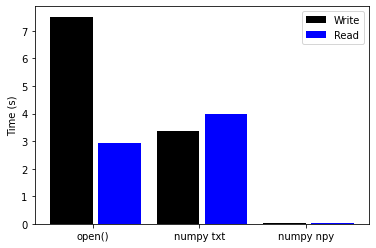

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)

X = np.arange(3)
ax.bar(X + 0.00, [total_save_time_open, total_save_time_savetxt, total_save_time_save], color = 'k', width = 0.4, label="Write")
ax.bar(X + 0.45, [total_read_time_open, total_read_time_loadtxt, total_read_time_load], color = 'b', width = 0.4, label="Read")
ax.set_xticks(X+0.2, ('open()', 'numpy txt', 'numpy npy'))
ax.set_ylabel("Time (s)")
#ax.set_xlabel("Method")
plt.legend()
plt.show()

<a id='4'></a>

## $(4.)$ Additional File types

**pickle, dill, json, h5py etc.**





-------------------------------------
---
<a id='5'></a>

# Further Topics Not Covered in the Course!

Color in, color out...the course has arrived to its end!

But don't be sad! There are way more things to know about python that we didn't have time to cover here!

Here you have a list of the possible following topics you could attack to deepen your programming skills:

- Using `.py` scripts to code instead of a Jupyter Notebook, running scripts from a terminal/console.


- Object Oriented Programming: the `class` conondrum.


- Assertions and error controls, `try`-`except`-`catch` structures.


- `map` and `lambda` functions.


- Manipulating images, videos, sound and other more exotic data types (openCV, sounddevice ...)


- Machine Learning and Deep Learning (pytorch, scikit-learn, tensorflow ...)


- Parallel processing using several CPU cores or using the GPU itself (mpi4py, multiprocessing, pytorch ...)


- Calling C/C++ functions under the hood (ctypes ...)


- Graphical user interfaces (pyQt ...)


- Standalone executables (pyinstaller ...)


- Web/mobile application development (flask ...)


- ...

Now that you have the basic notions for Python programming, you could follow almost any online course to continue exploring everything Python has to offer! You can look for free courses in pages like EdX, Coursera or even Youtube itself!

What is more, once you have integrated the concepts you have learnt here, you could even try to give a chance to other lower level programming languages as well! They are more complicated to program (you must have into account more things), but the essentials are the same.

And if not, note that unless you need some very very fast and optimized code you can manage with python. In fact, remember that most of the important libraries (numpy, pytorch, mpi4py etc.) in reality execute C or Fortran code under the hood, so the speed up is already available with Python, without requiring you to go down to the kitchen of hell!


It has been a pleasure to have you here!

For anything you need, you have our emails at the beginning of the notebooks,


**LLA & SCN$^\textbf{2}$** 